# TELECOM_CUSTOMER_CHURN_PREDICTION.

In [1]:
# Importing some of the libraries.
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
# Loading the Dataset.
data = pd.read_csv('/Users/tarakram/Documents/telecom_customer_churn/Telecom_customer_churn_Prediction./Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the Data.
+ customerID: A unique identifier assigned to each customer.
+ gender: The gender of the customer (male or female).
+ SeniorCitizen: A binary variable indicating whether the customer is a senior citizen or not (1 for senior citizen and 0 for non-senior citizen).
+ Partner: A binary variable indicating whether the customer has a partner or not (1 for yes and 0 for no).
+ Dependents: A binary variable indicating whether the customer has dependents or not (1 for yes and 0 for no).
+ tenure: The number of months the customer has been with the telecom company.
+ PhoneService: A binary variable indicating whether the customer has a phone service or not (1 for yes and 0 for no).
+ MultipleLines: A binary variable indicating whether the customer has multiple phone lines or not (1 for yes and 0 for no).
+ InternetService: The type of internet service the customer has subscribed to (DSL, Fiber optic, or No).
+ OnlineSecurity: A binary variable indicating whether the customer has online security or not (1 for yes and 0 for no).
+ OnlineBackup: A binary variable indicating whether the customer has online backup or not (1 for yes and 0 for no).
+ DeviceProtection: A binary variable indicating whether the customer has device protection or not (1 for yes and 0 for no).
+ TechSupport: A binary variable indicating whether the customer has technical support or not (1 for yes and 0 for no).
+ StreamingTV: A binary variable indicating whether the customer has streaming TV or not (1 for yes and 0 for no).
+ StreamingMovies: A binary variable indicating whether the customer has streaming movies or not (1 for yes and 0 for no).
+ Contract: The type of contract the customer has subscribed to (Month-to-month, One year, or Two year).
+ PaperlessBilling: A binary variable indicating whether the customer has opted for paperless billing or not (1 for yes and 0 for no).
+ PaymentMethod: The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic)).
+ MonthlyCharges: The amount charged to the customer on a monthly basis.
+ TotalCharges: The total amount charged to the customer over the entire tenure period.
+ Churn: A binary variable indicating whether the customer has churned or not (1 for churned and 0 for retained).

In [3]:
print(f'Our Data has {data.shape[0]} rows, and {data.shape[1]} Columns.')

Our Data has 7043 rows, and 21 Columns.


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Most of the data is in Objects, and Machines only understand numbers, so are going to change them into int in preprocessing module.

In [6]:
# Lets see the Descriptive Statistics.
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we have three columns.
seniorCitizen is a categorical variable so it only have 0 or 1.<br>
The average Tenure - 32 months, and 75% customers are less than 55 months.<br>
The Average Monthly Charges are 64 dollars, and 75% customers pay less than 89 Dollars.

In [7]:
# Lets Explore the Churn Column.
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We can clearly See that we have imbalanced data, having customers of NO-5174, and customer of YES-1869.

In [8]:
# If we see the Percentage.
100*data['Churn'].value_counts()/len(data['Churn'])


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [9]:
# WE have 73% NO, and 26% YES - This is generally Happens because a user usally stick to one telecom.
# until and unless he/she faces problems.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning.

In [11]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [12]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
# Luckily we dont have any null values or duplicated Values.

In [15]:
data['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [16]:
# the Tenure means 12 months, so we can create a labels.
labels = ['{0}-{1}'.format(i,i+ 11)for i in range(1,72,12)]
data['tenure_group'] = pd.cut(data.tenure, range(1,80,12), right = False, labels = labels)

In [17]:
data['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [18]:
# We have created a bin of 12 months and most of customers are in top three bins.

In [19]:
# Removing the data, that doesn't value towards our target.
data.drop(['customerID','tenure'], axis = 1, inplace = True)

In [20]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12


## EDA

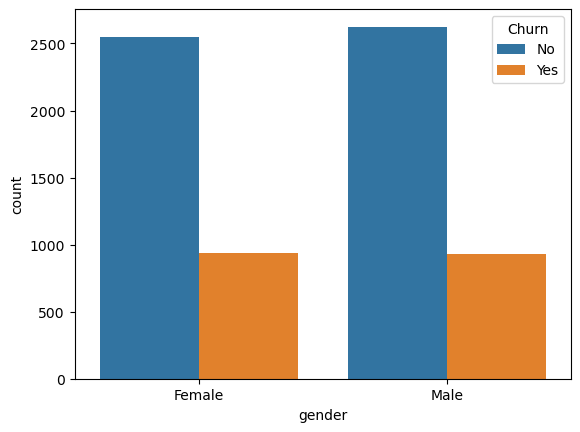

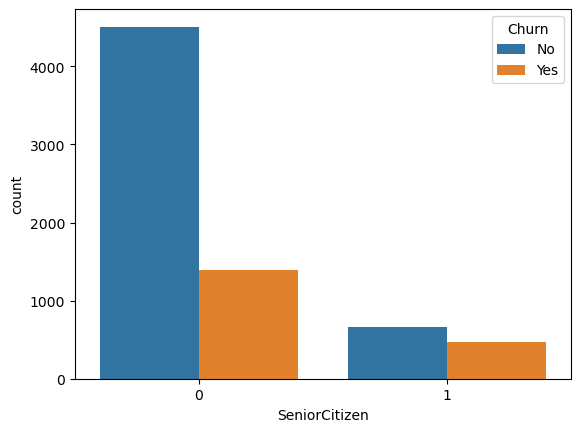

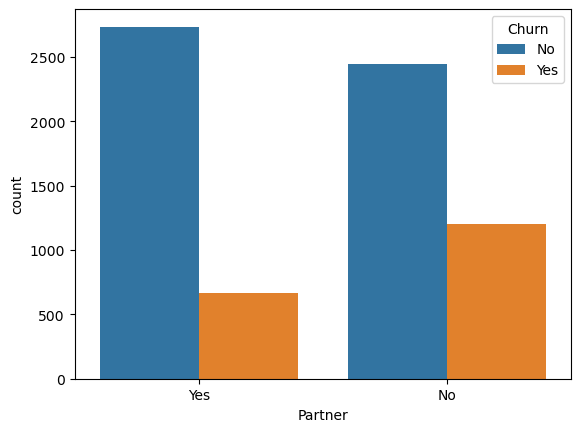

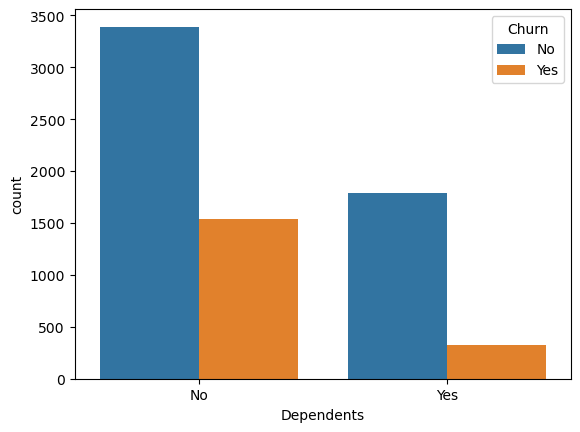

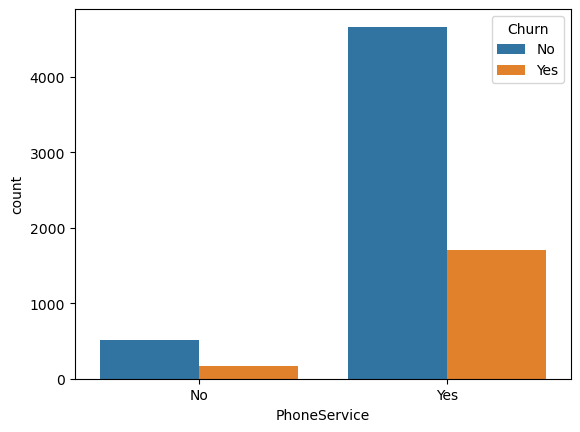

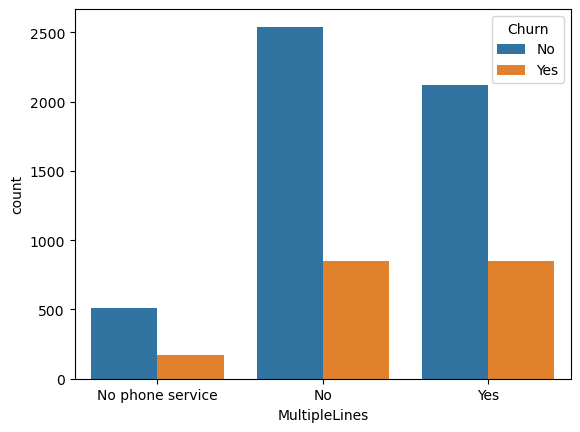

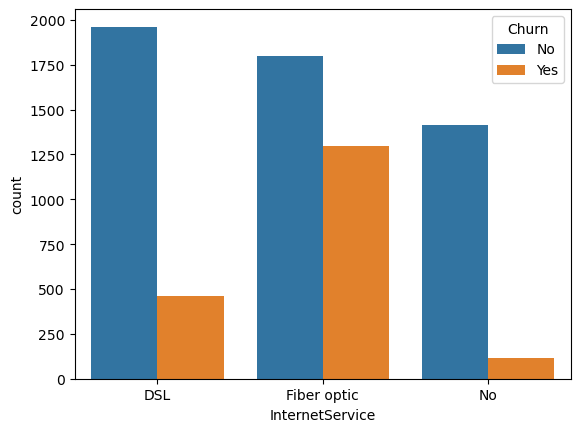

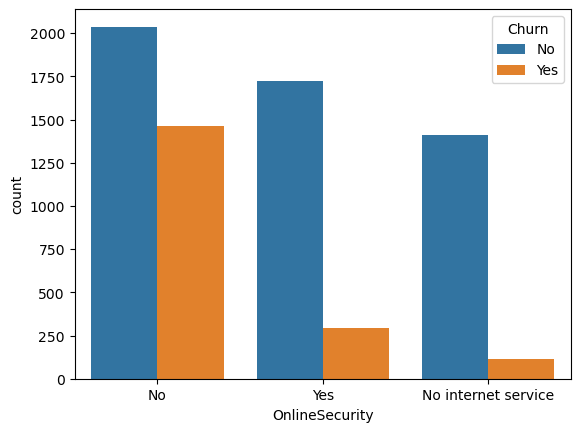

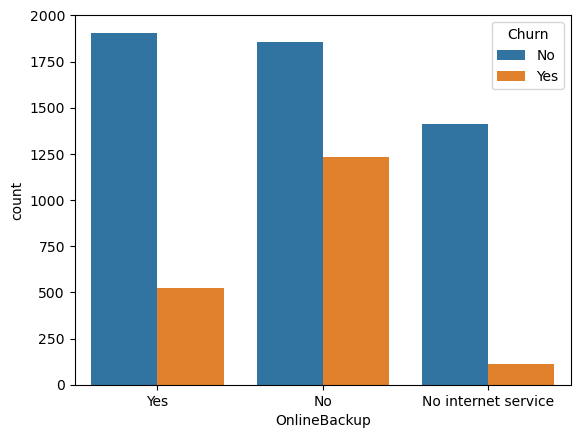

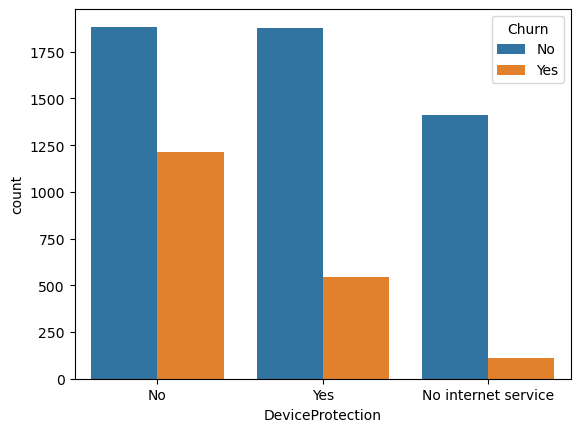

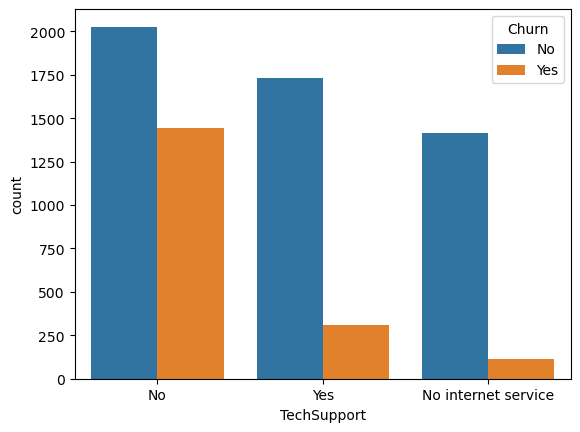

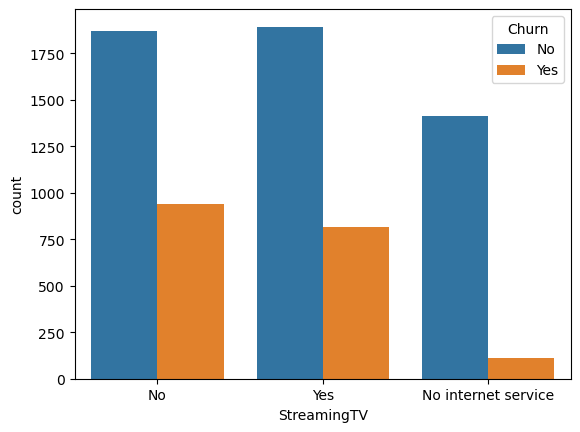

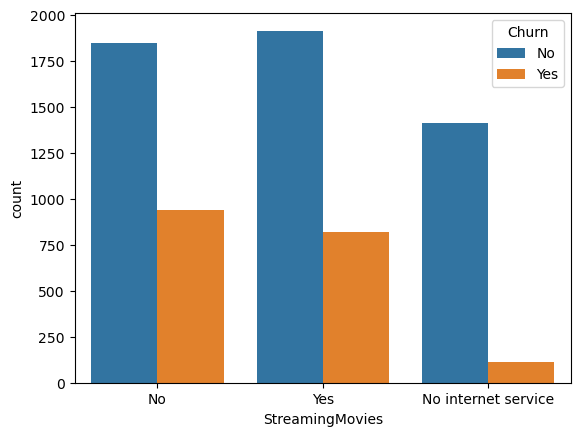

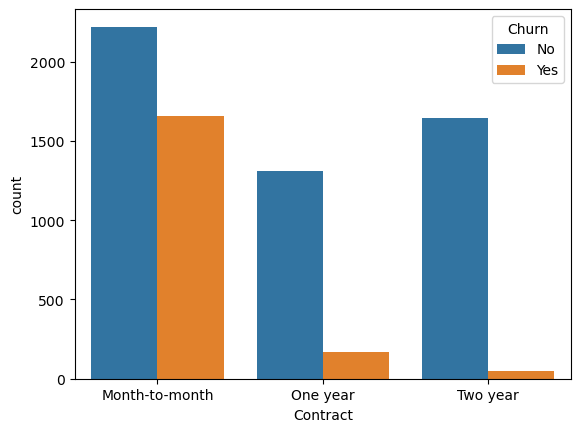

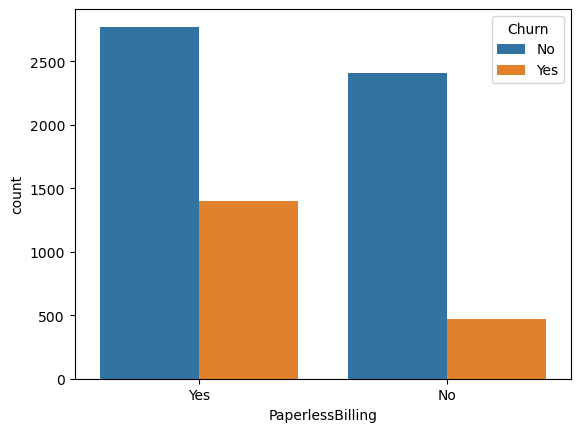

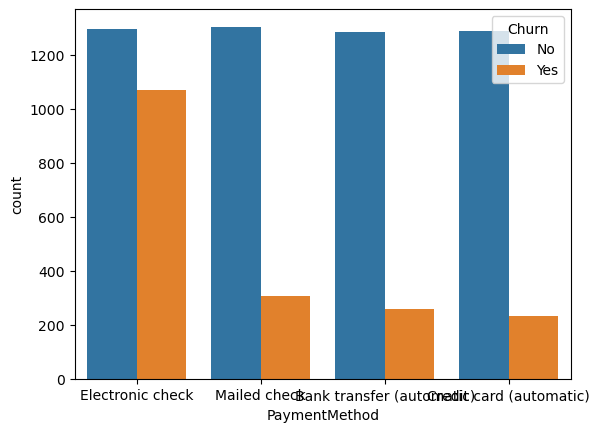

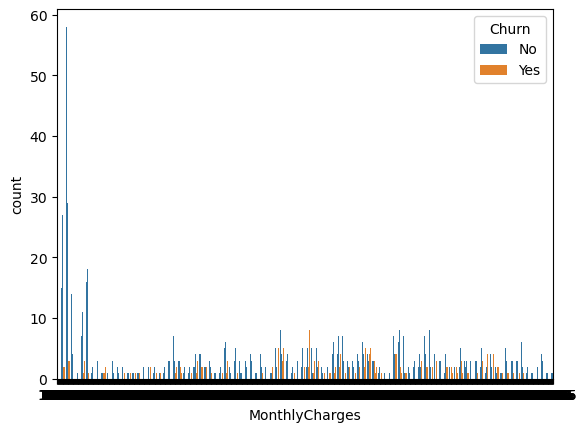

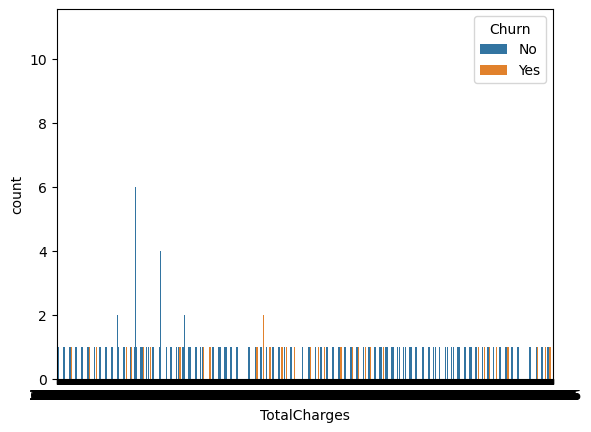

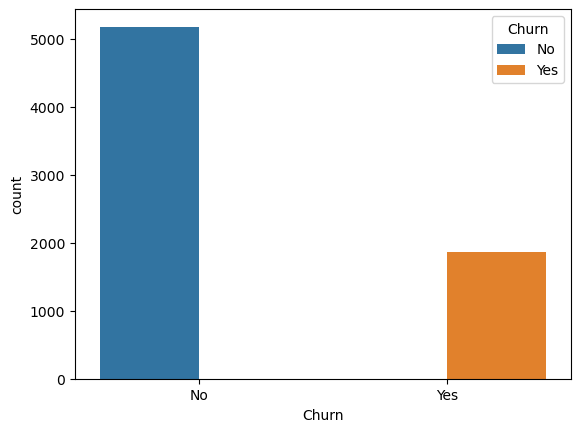

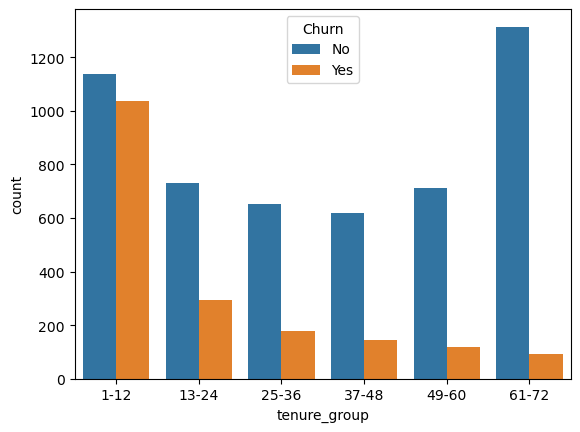

In [22]:
# creating a loop for visualization.
import matplotlib.pyplot as plt
import seaborn as sns
for i, predictor in enumerate(data):
    plt.figure(i)
    sns.countplot(data = data, x = predictor, hue = 'Churn')

In [23]:
# we can all the visualizations.

In [24]:
# lets convert our data into numeric.

In [25]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [31]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int64   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   int64   
 4   PhoneService      7043 non-null   int64   
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   int64   
 12  StreamingMovies   7043 non-null   int64   
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   int64   
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

Columns that we want to change them into numeric- gender,Patner,Dependents,PhoneService,PaperBilling,Churn


In [33]:
from sklearn.preprocessing import LabelEncoder

columns = ['gender', 'Partner', 'Dependents', 'PhoneService','StreamingMovies','StreamingTV', 'PaperlessBilling', 'Churn']

for col in columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col]) 

In [34]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,No phone service,DSL,No,Yes,No,No,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1-12
1,1,0,0,0,1,No,DSL,Yes,No,Yes,No,0,0,One year,0,Mailed check,56.95,1889.50,0,25-36
2,1,0,0,0,1,No,DSL,Yes,Yes,No,No,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1-12
3,1,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37-48
4,0,0,0,0,1,No,Fiber optic,No,No,No,No,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1-12


In [35]:
# converting all the categorical values into dummy variables.
new_data = pd.get_dummies(data)
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,1,0,0,0,0,1,29.85,29.85,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,56.95,1889.50,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,1,0,0,1,53.85,108.15,...,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,42.30,1840.75,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,70.70,151.65,...,0,0,1,0,1,0,0,0,0,0


In [39]:
new_data.corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
gender,1.000000,-0.001874,-0.001808,0.010517,-0.006488,-0.006421,-0.008743,-0.011754,-0.014569,0.000048,...,-0.016024,0.001215,0.000752,0.013744,-0.001134,-0.000701,0.006196,-0.020684,-0.004362,0.016199
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.008576,0.030776,0.047266,0.156530,0.220173,0.102411,...,-0.016159,-0.024135,0.171718,-0.153477,-0.027239,0.002144,0.027562,-0.000689,0.014434,-0.002062
Partner,-0.001808,0.016479,1.000000,0.452676,0.017706,0.137341,0.129574,-0.014877,0.096848,0.319072,...,0.110706,0.082029,-0.083852,-0.095125,-0.305407,-0.048868,0.002744,0.034694,0.104860,0.279545
Dependents,0.010517,-0.211185,0.452676,1.000000,-0.001762,0.046885,0.021321,-0.111377,-0.113890,0.064653,...,0.052021,0.060267,-0.150642,0.059071,-0.146661,-0.002443,0.008396,0.022665,0.030483,0.116656
PhoneService,-0.006488,0.008576,0.017706,-0.001762,1.000000,0.055353,0.043870,0.016505,0.247398,0.113008,...,0.007556,-0.007721,0.003062,-0.003319,-0.006637,0.012473,-0.000646,-0.018877,-0.009571,0.020708
StreamingTV,-0.006421,0.030776,0.137341,0.046885,0.055353,1.000000,0.434772,0.096642,0.336706,0.392472,...,0.049865,0.044931,0.026359,-0.122756,-0.229967,-0.047349,-0.002899,0.041397,0.087076,0.206091
StreamingMovies,-0.008743,0.047266,0.129574,0.021321,0.043870,0.434772,1.000000,0.083700,0.335459,0.398088,...,0.052589,0.053967,0.019294,-0.126351,-0.230444,-0.051563,0.002118,0.031368,0.086119,0.217310
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.016505,0.096642,0.083700,1.000000,0.352150,0.157830,...,-0.016332,-0.013589,0.208865,-0.205398,-0.003175,0.003744,-0.005126,-0.001182,0.010987,-0.000905
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247398,0.336706,0.335459,0.352150,1.000000,0.651065,...,0.042812,0.030550,0.271625,-0.377437,-0.190827,-0.046670,0.009899,0.018019,0.070420,0.185840
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.113008,0.392472,0.398088,0.157830,0.651065,1.000000,...,0.186119,0.182663,-0.060436,-0.294708,-0.592443,-0.210745,-0.047370,0.083696,0.252905,0.639312


In [40]:
# here it is really Hard to see the correaltion, lets plot heatmap.

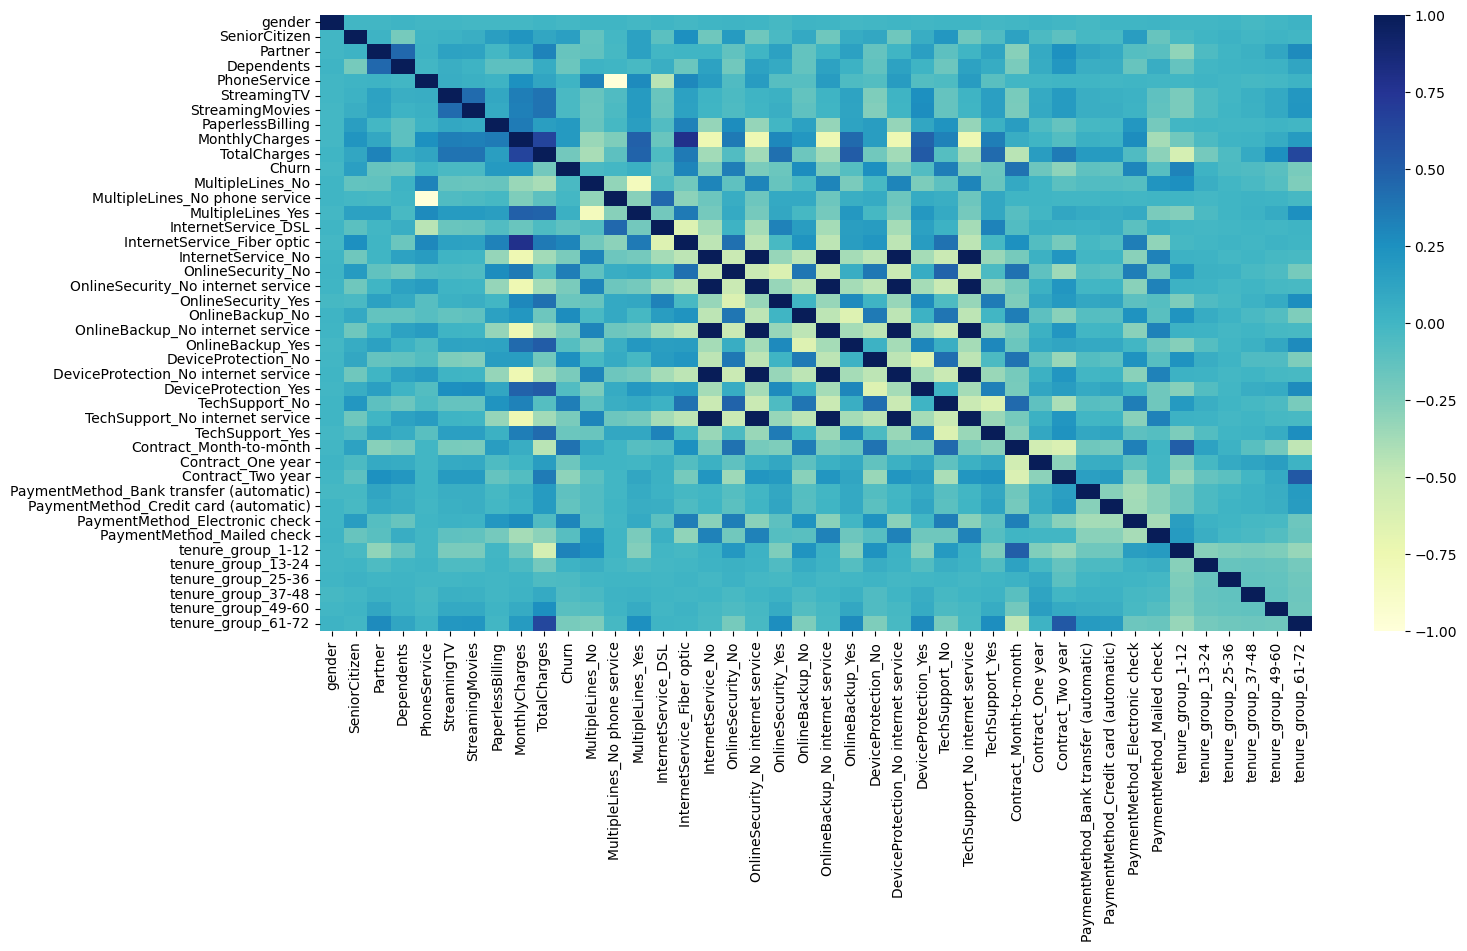

In [44]:
plt.figure(figsize= (16,8))
sns.heatmap(new_data.corr(), cmap = 'YlGnBu')
plt.show()

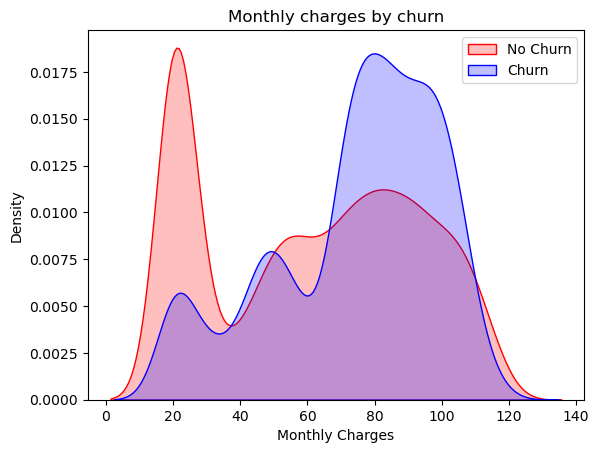

In [46]:
# Churn by Monthly Charges and Total Charges
Mth = sns.kdeplot(new_data.MonthlyCharges[(new_data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(new_data.MonthlyCharges[(new_data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

In [47]:
# We can see, if the monthly charges are increased, churn rate is very high.

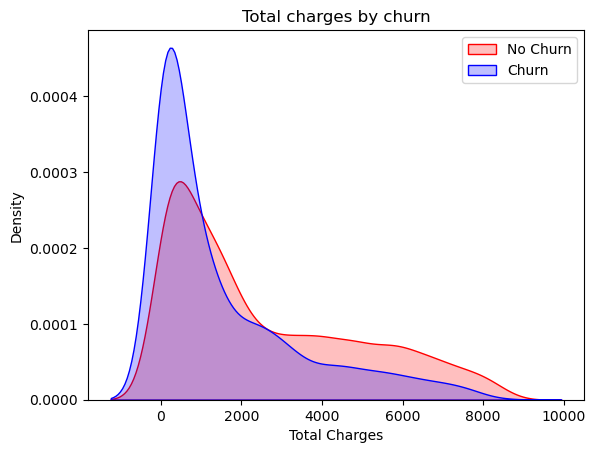

In [49]:
Tot = sns.kdeplot(new_data.TotalCharges[(new_data["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(new_data.TotalCharges[(new_data["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')
plt.show()

In [50]:
# If the price is lower also, the churn is high.

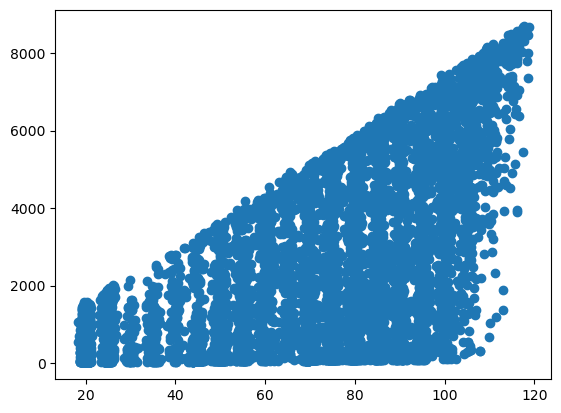

In [54]:
plt.scatter(data= data, x = 'MonthlyCharges', y ='TotalCharges' )
plt.show()

In [55]:
# Total Charges are increased as the monthly charges are increased.